## Section 1:

In [ ]:
binomial_pmf <- function(n, p, X) {
  probabilities <- numeric(length(X))

  for (i in seq_along(X)) {
    x <- X[i]
    combinations <- choose(n, x)
    probability <- combinations * (p ^ x) * ((1 - p) ^ (n - x))
    probabilities[i] <- probability
  }

  return(probabilities)
}

binomial_cdf <- function(n, p, k) {
  X <- 0:k
  cumulative_probability <- sum(binomial_pmf(n, p, X))
  return(cumulative_probability)
}

n <- 1000
p <- 0.45
max_attendees <- 430

prob_at_most_430 <- binomial_cdf(n, p, max_attendees)
cat(sprintf("Probability that 430 or fewer people will respond positively: %.4f\n", prob_at_most_430))

Probability that 430 or fewer people will respond positively: 0.1075


## Section 2:

In [12]:
mean <- n * p
std <- sqrt(n * p * (1 - p))

prob_at_most_430_normal <- pnorm(max_attendees, mean, std)

relative_error <- (abs(prob_at_most_430 - prob_at_most_430_normal) / prob_at_most_430) * 100

cat(sprintf("Exact probability (Binomial): %.4f\n", prob_at_most_430))
cat(sprintf("Approximate probability (Normal): %.4f\n", prob_at_most_430_normal))
cat(sprintf("Relative error of normal approximation: %.4f%%\n", relative_error))

Exact probability (Binomial): 0.1075
Approximate probability (Normal): 0.1018
Relative error of normal approximation: 5.2575%


## Section 3:

To improve the approximation of the binomial probability using the normal distribution, we can apply a continuity correction. This correction helps to account for the fact that the binomial distribution is discrete, while the normal distribution is continuous. The correction typically involves adjusting the threshold by ±0.5 when calculating probabilities.

In [13]:
corrected_threshold <- max_attendees + 0.5
prob_at_most_430_corrected_normal <- pnorm(corrected_threshold, mean, std)

relative_error_corrected <- (abs(prob_at_most_430 - prob_at_most_430_corrected_normal) / prob_at_most_430) * 100

cat(sprintf("Exact probability (Binomial): %.4f\n", prob_at_most_430))
cat(sprintf("Approximate probability with continuity correction (Normal): %.4f\n", prob_at_most_430_corrected_normal))
cat(sprintf("Relative error with continuity correction: %.4f%%\n", relative_error_corrected))

Exact probability (Binomial): 0.1075
Approximate probability with continuity correction (Normal): 0.1076
Relative error with continuity correction: 0.1081%


## Section 4:

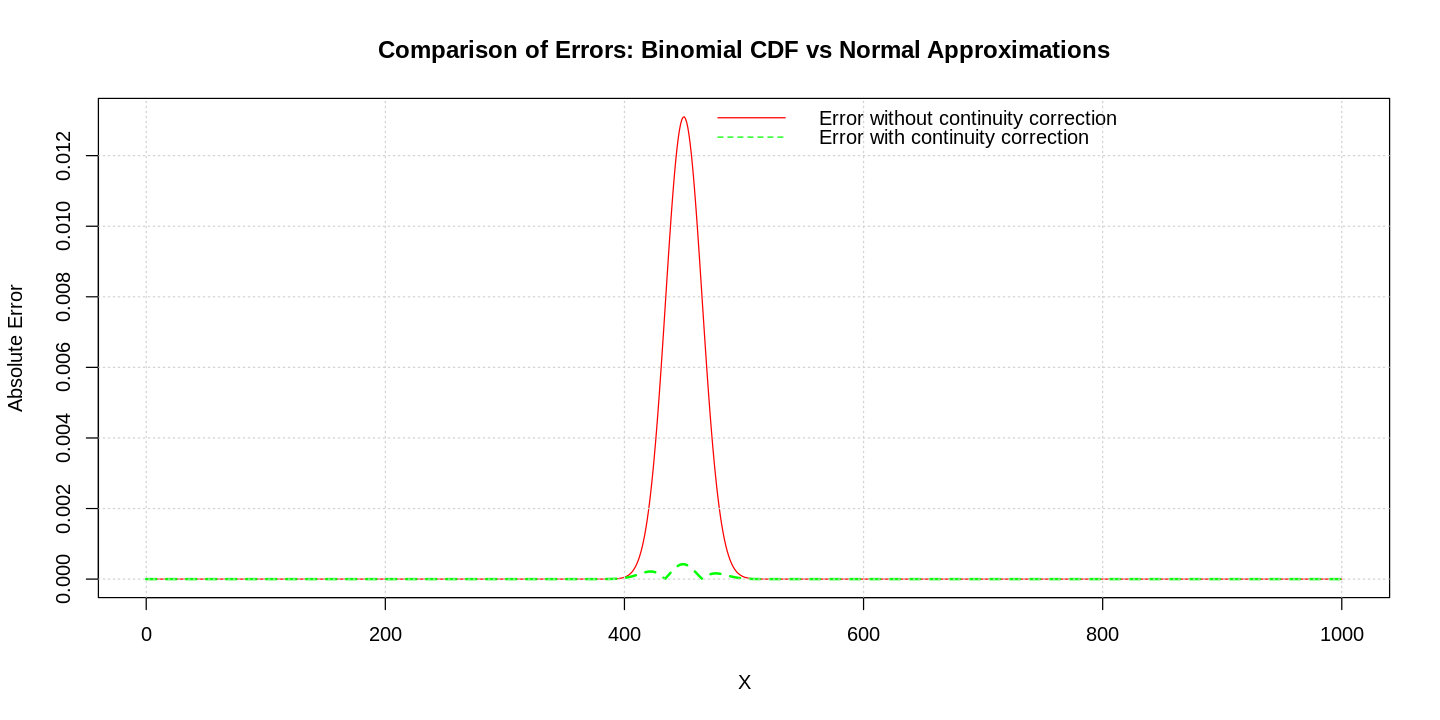

In [18]:
X <- 0:n

binomial_cdf_probs <- sapply(X, function(x) binomial_cdf(n, p, x))
normal_cdf_probs_no_correction <- pnorm(X, mean, std)
normal_cdf_probs_with_correction <- pnorm(X + 0.5, mean, std)

errors_no_correction <- abs(binomial_cdf_probs - normal_cdf_probs_no_correction)
errors_with_correction <- abs(binomial_cdf_probs - normal_cdf_probs_with_correction)

plot(X, errors_no_correction, type = "l", col = "red",
     xlab = "X", ylab = "Absolute Error", ylim = c(0, max(errors_no_correction, errors_with_correction)),
     main = "Comparison of Errors: Binomial CDF vs Normal Approximations")
lines(X, errors_with_correction, col = "green", lty = 2, lwd = 2)

legend("topright", legend = c("Error without continuity correction", "Error with continuity correction"),
       col = c("red", "green"), lty = 1:2, bty = "n")
grid()

The analysis highlights the significant improvement in accuracy achieved by applying continuity correction when approximating the binomial distribution with the normal distribution. The continuity correction provides a more stable and reliable approximation, reducing errors and aligning closer to the exact binomial probabilities (The green dashed line)

## Section 5:

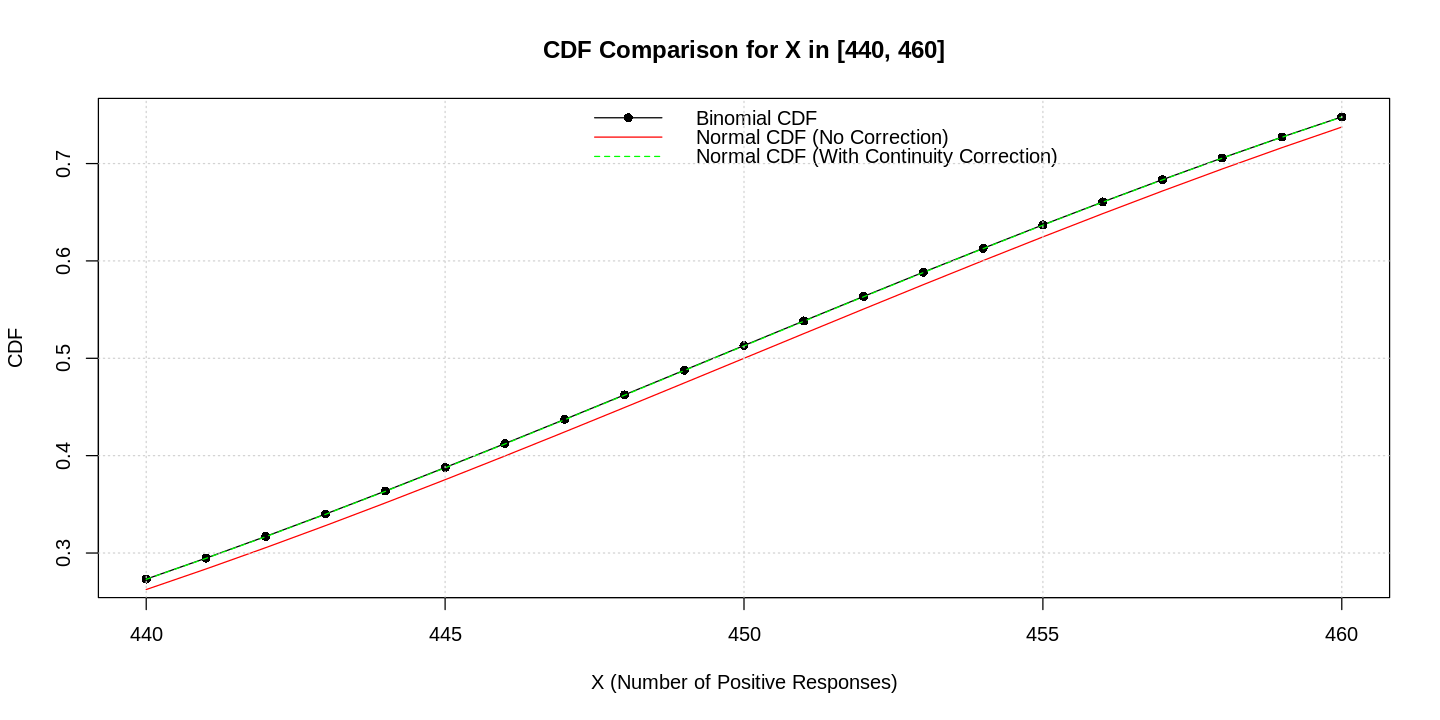

In [26]:
X <- 440:460

binomial_cdf_probs <- sapply(X, function(x) binomial_cdf(n, p, x))
normal_cdf_probs_no_correction <- pnorm(X, mean, std)
normal_cdf_probs_with_correction <- pnorm(X + 0.5, mean, std)

plot(X, binomial_cdf_probs, type = 'o', col = 'black', pch = 16,
     xlab = 'X (Number of Positive Responses)', ylab = 'CDF',
     main = 'CDF Comparison for X in [440, 460]')
lines(X, normal_cdf_probs_no_correction, col = 'red')
lines(X, normal_cdf_probs_with_correction, col = 'green', lty = 2)

legend("topright", legend = c("Binomial CDF", "Normal CDF (No Correction)", "Normal CDF (With Continuity Correction)"),
       col = c("black", "red", "green"), pch = c(16, NA, NA), lty = c(1, 1, 2), bty = 'n')
grid()

The uncorrected normal approximation (red) consistently shows higher errors compared to the binomial CDF. While on the other hand, The continuity-corrected normal approximation (green) demonstrates a much closer alignment with the binomial CDF, highlighting the importance of applying this correction for more accurate results.

## Section 6:

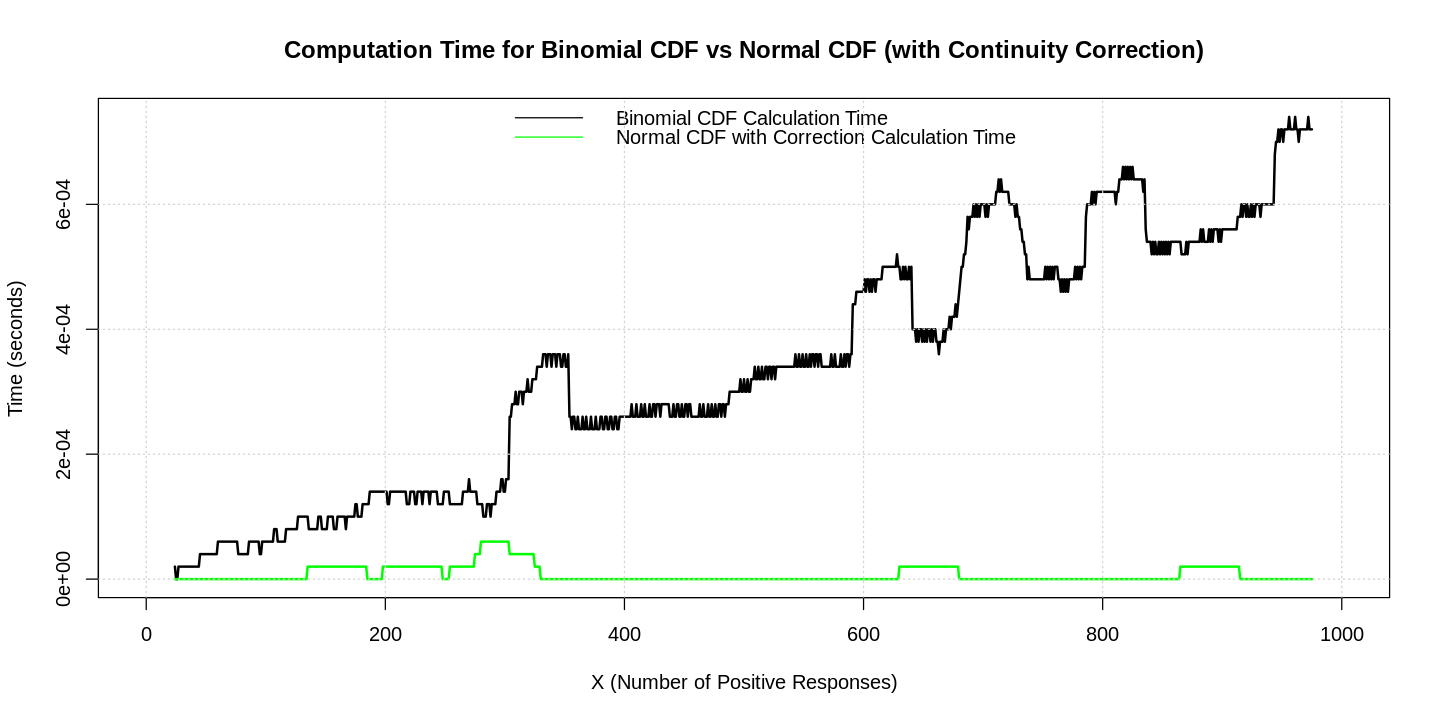

In [33]:
get_elapsed_time <- function(func, ...) {
  start <- proc.time()[3]
  func(...)
  end <- proc.time()[3]
  return(end - start)
}

normal_cdf_with_correction <- function(x, mean, std) {
  return(pnorm(x + 0.5, mean, std))
}

X <- 0:1000
binomial_elapsedTime <- numeric(length(X))
normal_elapsedTime <- numeric(length(X))

for (i in seq_along(X)) {
  binomial_elapsedTime[i] <- get_elapsed_time(binomial_cdf, n, p, X[i])
  normal_elapsedTime[i] <- get_elapsed_time(normal_cdf_with_correction, X[i], mean, std)
}

moving_average <- function(x, n = 50) {
  filter(x, rep(1/n, n), sides = 2)
}

binomial_elapsedTime_smooth <- moving_average(binomial_elapsedTime)
normal_elapsedTime_smooth <- moving_average(normal_elapsedTime)

plot(X, binomial_elapsedTime_smooth, type = "l", col = "black",
     xlab = "X (Number of Positive Responses)", ylab = "Time (seconds)",
     main = "Computation Time for Binomial CDF vs Normal CDF (with Continuity Correction)", lwd = 2)
lines(X, normal_elapsedTime_smooth, col = "green", lwd = 2)

legend("topright", legend = c("Binomial CDF Calculation Time", "Normal CDF with Correction Calculation Time"),
       col = c("black", "green"), lty = 1, bty = "n")
grid()

For Binomial CDF, As 𝑋 increases, the computation time shows variability but follows a general upward trend while for Normal CDF (with Continuity Correction) This computation time remains relatively stable and low across the range of 𝑋. In conclusion, The Normal CDF calculation is computationally efficient due to its closed-form nature, requiring fewer operations compared to the iterative summation of probabilities in the binomial calculation.

## Section 7:

In [36]:
X <- 400:600
cdf_errors <- numeric(length(X))
time_increase <- numeric(length(X))

for (i in seq_along(X)) {
  cdf_errors[i] <- abs(pnorm(X[i] + 0.5, mean, std) - binomial_cdf(n, p, X[i]))
  time_increase[i] <- get_elapsed_time(binomial_cdf, n, p, X[i]) - get_elapsed_time(normal_cdf_with_correction, X[i], mean, std)
}

find_first_inefficient_x <- function(time_increase, cdf_errors, X) {
  for (i in seq_along(X)) {
    total_cost <- (100 * time_increase[i]) - (1000000 * cdf_errors[i])
    if (total_cost > 0) {
      return(X[i])
    }
  }
  return(NA)
}

first_inefficient_x <- find_first_inefficient_x(time_increase, cdf_errors, X)
cat(sprintf("The first value of X where using the binomial CDF becomes inefficient is: %d\n", first_inefficient_x))

The first value of X where using the binomial CDF becomes inefficient is: 524


## Section 8:

Total cost at X = 430: -116.14
Using the binomial CDF at X = 430 was cost-effective.



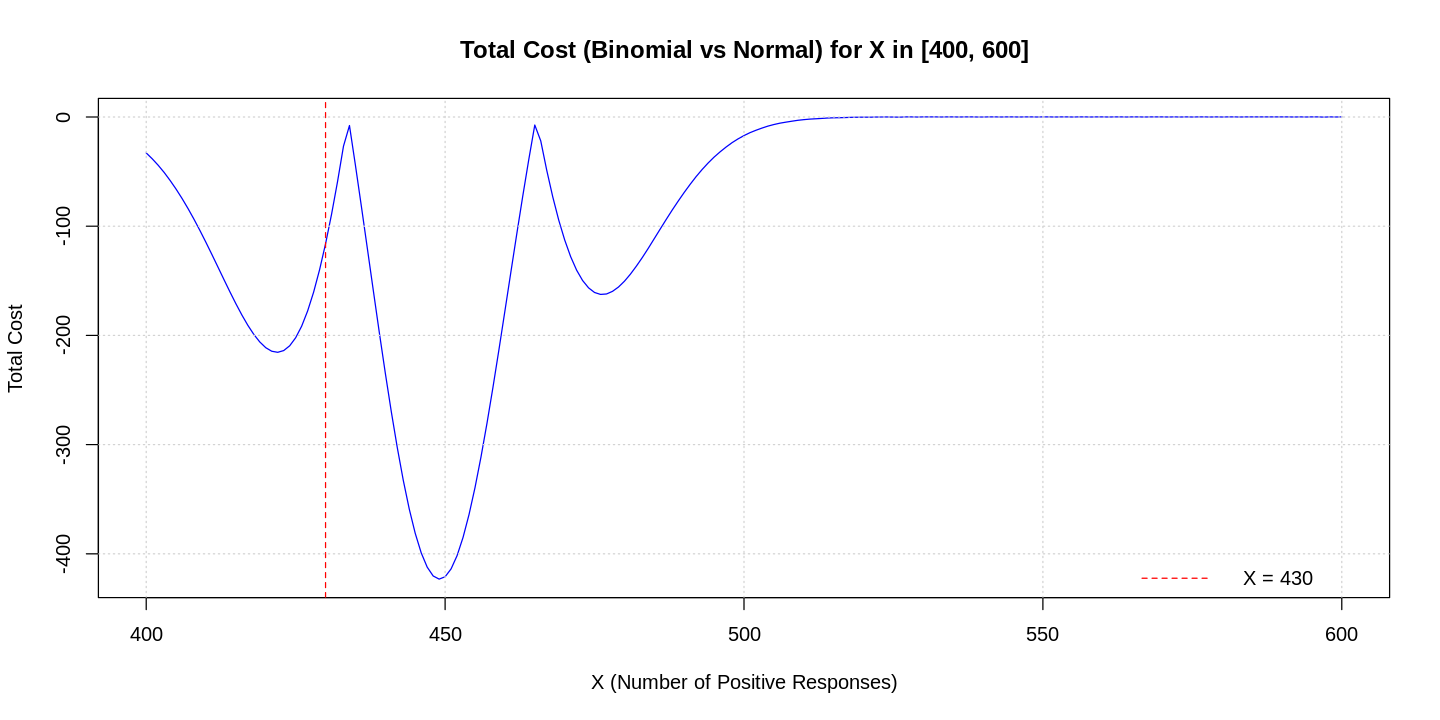

In [45]:
total_costs <- numeric(length(X))
for (i in seq_along(X)) {
  total_costs[i] <- (100 * time_increase[i]) - (1000000 * cdf_errors[i])
}

plot(X, total_costs, type = "l", col = "blue",
     xlab = "X (Number of Positive Responses)", ylab = "Total Cost",
     main = "Total Cost (Binomial vs Normal) for X in [400, 600]")
abline(v = 430, col = "red", lty = 2)
legend("bottomright", legend = "X = 430", col = "red", lty = 2, bty = "n")
grid()

x_430_cost <- total_costs[which(X == 430)]
cat(sprintf("Total cost at X = 430: %.2f\n", x_430_cost))
if (x_430_cost > 0) {
  cat("Using the binomial CDF at X = 430 was NOT cost-effective.\n\n")
} else {
  cat("Using the binomial CDF at X = 430 was cost-effective.\n\n")
}

### Defining an Efficient Strategy:
From the graph, if the total cost remains low or negative, it implies using the binomial CDF is more efficient, But if the total cost is positive, using the normal CDF is more efficient. here is the Strategy illustration:

No NA values found in method_choice. Proceeding with the plot.


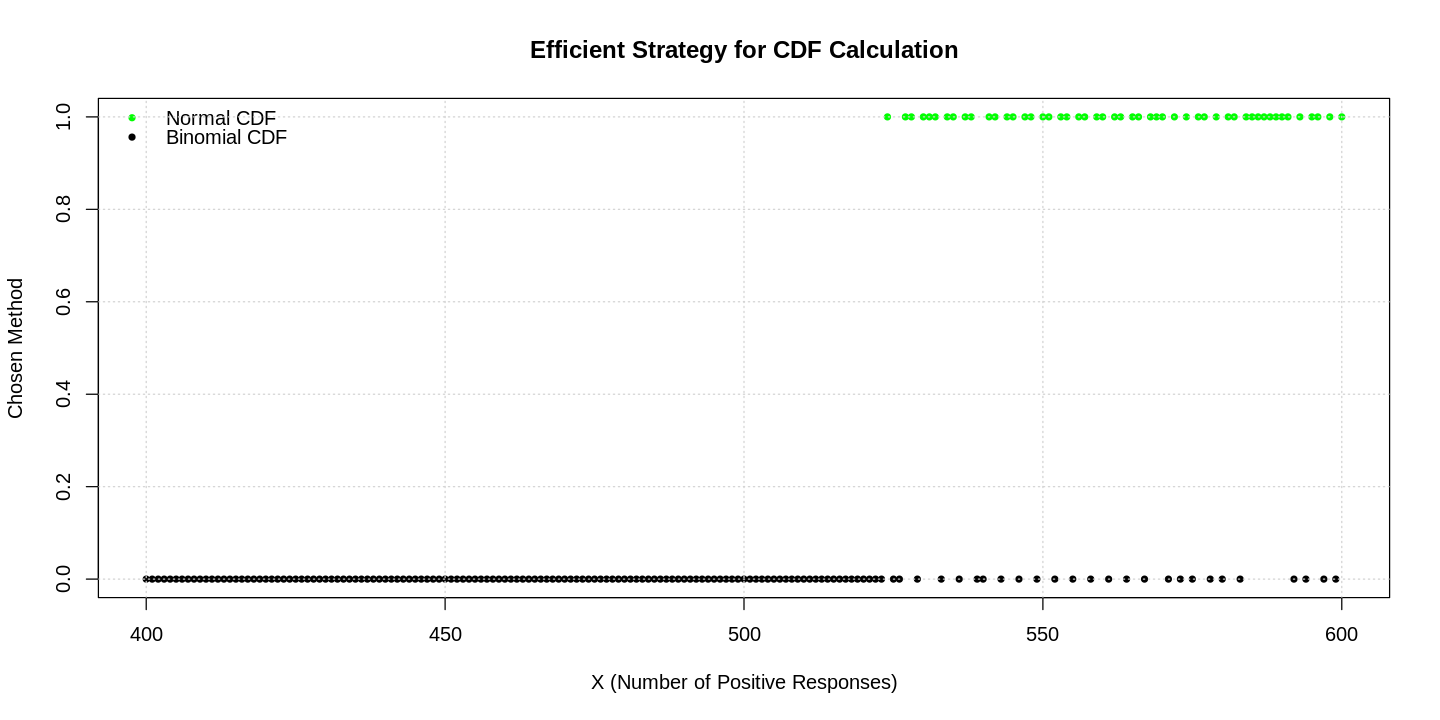

In [49]:
efficient_strategy <- function(X, time_increase, cdf_errors) {
  method <- character(length(X))

  for (i in seq_along(X)) {
    cost_time <- 100 * time_increase[i]
    cost_error <- 1000000 * cdf_errors[i]

    if (cost_time > cost_error) {
      method[i] <- "Normal"
    } else {
      method[i] <- "Binomial"
    }
  }
  return(method)
}

method_choice <- efficient_strategy(X, time_increase, cdf_errors)

if (any(is.na(method_choice))) {
  cat("There are NA values in method_choice. Please debug the strategy function.\n")
} else {
  cat("No NA values found in method_choice. Proceeding with the plot.\n")
}

plot(X, as.integer(method_choice == "Normal"), type = "p", col = ifelse(method_choice == "Normal", "green", "black"),
     xlab = "X (Number of Positive Responses)", ylab = "Chosen Method",
     main = "Efficient Strategy for CDF Calculation", pch = 20, ylim = c(0, 1))
legend("topleft", legend = c("Normal CDF", "Binomial CDF"),
       col = c("green", "black"), pch = 20, bty = "n")
grid()